In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('eda_ready.csv')

In [4]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1959,emaar mgf the palm drive,2.80,14358.0,3.0,3.0,2,"servant room,study room,pooja room",12.0,East,New Property,sector 66,1950.132,flat,1950.0,1920.0,1600.0,1,1,0,1,0,1,69
3175,indepedent,1.80,7627.0,4.0,5.0,0,not avilable,13.0,NaN,Undefined,sector 92,(219 sq.m.) built-up area,house,NaN,2360.0,NaN,0,0,0,0,0,2,0
1672,experion the heartsong,2.29,8240.0,4.0,5.0,3+,servant room,8.0,South,Relatively New,sector 108,2779.126,flat,NaN,2779.0,NaN,0,1,0,0,0,0,95
210,signature global the millennia,0.55,9166.0,2.0,2.0,3,not avilable,3.0,NaN,New Property,sector 37d,600.044,flat,600.0,NaN,NaN,0,0,0,0,0,2,53
2228,signature global park 4,0.85,11333.0,3.0,2.0,3,not avilable,1.0,NaN,New Property,sector 36,750.022,flat,NaN,NaN,750.0,0,0,0,0,0,2,33


# price

In [5]:
df['price'].describe()

count    3803.000000
mean        2.506227
std         2.954745
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

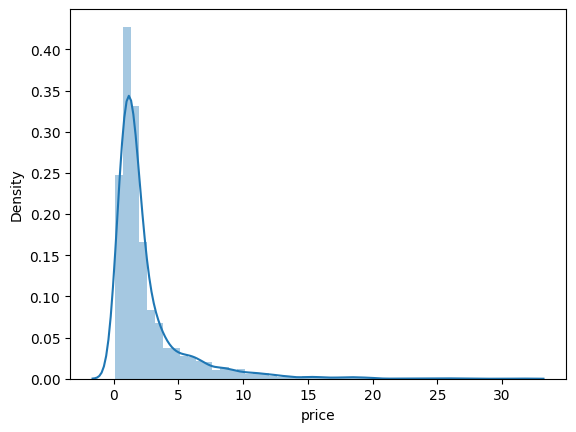

In [6]:
sns.distplot(df['price'])

In [7]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr


In [8]:
print(lower_bound,upper_bound)

-1.7500000000000004 5.370000000000001


In [9]:
outlier=df[df['price']>upper_bound]

In [10]:
outlier.shape

(439, 23)

In [11]:
outlier['price'].describe()

count    439.000000
mean       9.164556
std        4.049009
min        5.400000
25%        6.350000
50%        8.000000
75%       10.550000
max       31.500000
Name: price, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3966274098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier['price'])


<Axes: xlabel='price', ylabel='Density'>

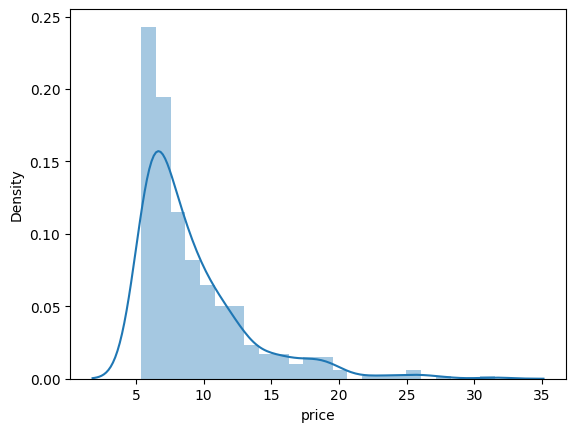

In [12]:
sns.distplot(outlier['price'])

In [13]:
outlier['type'].value_counts()

type
house    355
flat      84
Name: count, dtype: int64

In [14]:
outlier[outlier['luxury_score']==0]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
385,lagoon apartment,6.00,13636.0,4.0,6.0,3+,not avilable,7.0,NaN,Moderately Old,ambience island,4400.117,flat,NaN,NaN,4400.0,0,0,0,0,0,2,0
2031,dlf icon,5.80,20707.0,4.0,4.0,3+,not avilable,18.0,NaN,Undefined,sector 43,2800.985,flat,NaN,2801.0,NaN,0,0,0,0,0,2,0
2114,elevate,6.75,19882.0,4.0,4.0,0,not avilable,10.0,NaN,Undefined,sector 50,3395.031,flat,NaN,3395.0,NaN,0,0,0,0,0,2,0
2399,the ivy,6.00,15765.0,4.0,5.0,3,not avilable,2.0,North-East,Undefined,sushant lok,3805.899,flat,NaN,3806.0,NaN,0,0,0,0,0,2,0
2546,ambience caitriona,14.00,200000.0,4.0,5.0,3,not avilable,3.0,East,Undefined,sector 24,700.0,flat,NaN,700.0,NaN,0,0,0,0,0,2,0
2597,unitech vistas,9.00,57507.0,3.0,3.0,0,not avilable,7.0,NaN,Undefined,sector 70,1565.027,flat,NaN,1565.0,NaN,0,0,0,0,0,2,0
2923,indepedent,5.60,17284.0,8.0,6.0,3+,"pooja room,study room,servant room,store room",NaN,South-West,Moderately Old,sector 2,3240.0,house,NaN,3240.0,NaN,1,1,1,1,0,2,0
3095,indepedent,8.00,230547.0,10.0,10.0,3+,not avilable,1.0,North,Undefined,sector 38,(32 sq.m.) built-up area,house,NaN,347.0,215.0,0,0,0,0,0,2,0
3108,indepedent,6.50,21667.0,5.0,6.0,0,not avilable,1.0,NaN,Undefined,sector 50,(279 sq.m.) built-up area,house,NaN,3000.0,NaN,0,0,0,0,0,2,0
3126,indepedent,6.00,20000.0,4.0,4.0,1,not avilable,2.0,NaN,Relatively New,sector 2,(278 sq.m.) built-up area,house,NaN,333.0,NaN,0,0,0,0,0,2,0


In [15]:
df.loc[3126,'built_up_area']=22992

In [16]:
ind=outlier[(outlier['luxury_score']==0)&(outlier['built_up_area']<1000)].index

In [17]:
df.drop(ind,axis=0,inplace=True)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

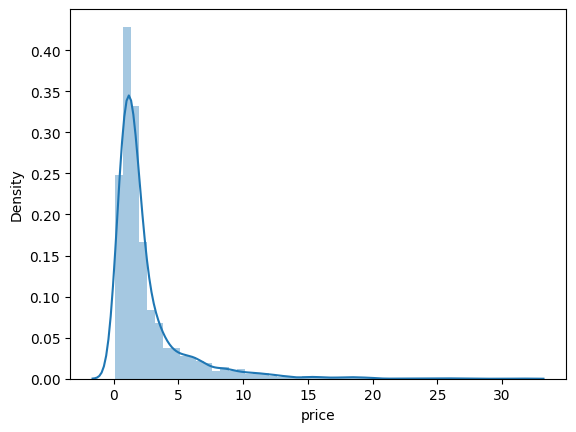

In [18]:
sns.distplot(df['price'])

<Axes: >

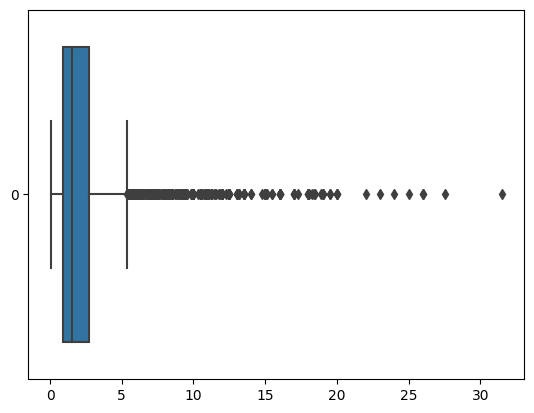

In [19]:
sns.boxplot(df['price'],orient='h')

# price per sq ft

In [20]:
df['price_persqft'].describe()

count      3846.000000
mean      13880.242330
std       22716.703303
min           2.000000
25%        6828.750000
50%        9040.000000
75%       13889.000000
max      600000.000000
Name: price_persqft, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3261122634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_persqft'])


<Axes: xlabel='price_persqft', ylabel='Density'>

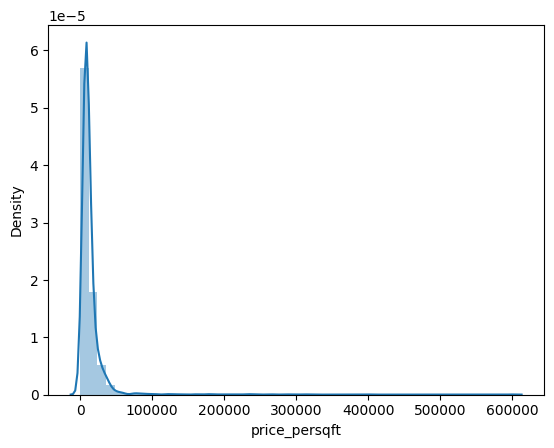

In [21]:
sns.distplot(df['price_persqft'])

<Axes: >

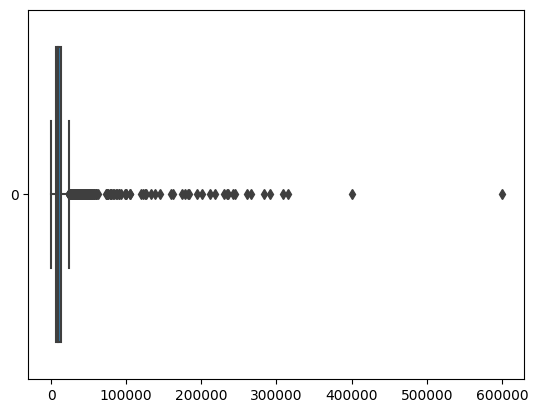

In [22]:
sns.boxplot(df['price_persqft'],orient='h')

In [23]:
df[df['price_persqft']>300000]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3249,indepedent,6.00,315789.0,9.0,6.0,2,not avilable,2.0,North-East,Old Property,sector 12,(18 sq.m.) plot area,house,NaN,NaN,1600.0,0,0,0,0,0,2,0
3473,ansal,1.85,308333.0,8.0,8.0,3+,not avilable,5.0,North-West,Relatively New,sector 43,NaN,house,NaN,60.0,NaN,0,0,0,0,0,2,53
3526,emaar the palm springs,24.00,600000.0,5.0,5.0,2,"pooja room,study room,servant room",1.0,North-East,Old Property,sector 54,398.0,house,NaN,400.0,NaN,1,1,0,1,0,0,122
3566,dlf city plots phase 2,10.00,400000.0,12.0,12.0,3+,"study room,servant room",4.0,North,Relatively New,sector 25,248.0,house,NaN,250.0,NaN,1,1,0,0,0,0,114


area 18sqm -->carpet area 1600 sqft data error index=3249

In [24]:
df.drop(3249,axis=0,inplace=True)

In [25]:
# Calculate the IQR for the 'price' column
Q1 = df['price_persqft'].quantile(0.25)
Q3 = df['price_persqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_persqft'] < lower_bound) | (df['price_persqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_persqft'].describe()

num_outliers, outliers_sqft_stats

(369,
 count       369.000000
 mean      51682.821138
 std       58027.751843
 min       24489.000000
 25%       28000.000000
 50%       33333.000000
 75%       42194.000000
 max      600000.000000
 Name: price_persqft, dtype: float64)

In [26]:
outliers_sqft

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
31,ompee k s residency,1.60,26936.0,2.0,2.0,2,not avilable,1.0,NaN,Relatively New,new sector 2,594.001,flat,NaN,NaN,66.000000,0,0,0,0,0,2,0
250,tulip monsella,8.25,28000.0,3.0,4.0,3,servant room,8.0,NaN,Undefined,sector 53,2946.429,flat,2940.0,NaN,NaN,0,1,0,0,0,1,35
255,emaar digihomes,4.25,26562.0,3.0,3.0,3,study room,8.0,NaN,Under Construction,sector 62,1600.03,flat,NaN,NaN,1600.000000,1,0,0,0,0,2,16
282,dlf the grove,5.70,41245.0,3.0,3.0,3,not avilable,1.0,East,Undefined,sector 54,1381.986,flat,NaN,1382.00,NaN,0,0,0,0,0,2,46
307,puri the aravallis,3.90,33209.0,3.0,4.0,3+,servant room,33.0,South,Undefined,sector 61,1174.38,flat,NaN,NaN,1249.688790,0,1,0,0,0,2,158
408,central park resorts,11.25,28266.0,4.0,5.0,3+,"pooja room,servant room",2.0,North-West,Relatively New,sector 48,3980.047,flat,NaN,NaN,3980.000000,0,1,0,1,0,2,45
429,m3m latitude,4.60,26790.0,3.0,3.0,3,"servant room,pooja room,study room,store room",7.0,South,New Property,sector 65,1717.059,flat,NaN,NaN,1717.000000,1,1,1,1,0,2,115
452,ambience creacions,4.10,28101.0,3.0,3.0,3+,not avilable,2.0,North-East,New Property,sector 22,1459.023,flat,2781.0,NaN,1459.000000,0,0,0,0,0,1,119
653,dlf the crest,11.00,35483.0,4.0,5.0,3+,"pooja room,study room,servant room",7.0,North-East,Relatively New,sector 54,3100.076,flat,NaN,NaN,3100.000000,1,1,0,1,0,2,49
932,dlf park place,6.75,24963.0,4.0,4.0,2,servant room,8.0,North,Moderately Old,sector 54,2704.002,flat,2704.0,NaN,1534.000000,0,1,0,0,0,1,135


/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/1334977903.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliers_sqft['price_persqft'])


<Axes: xlabel='price_persqft', ylabel='Density'>

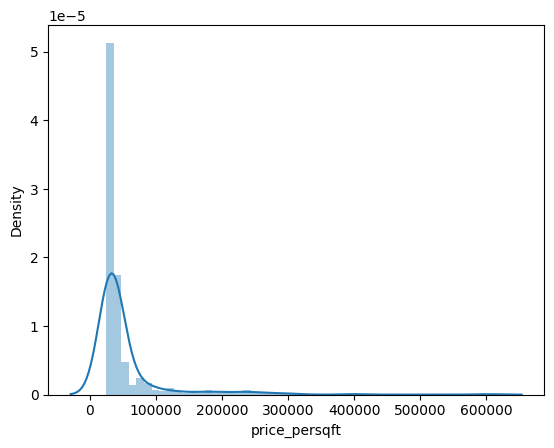

In [27]:
sns.distplot(outliers_sqft['price_persqft'])

In [28]:
import re
def extract(text):
    match = re.search(r'\((\d*\.?\d+) sq\.m\.\)', text)
    if match:
        return float(match.group(1)) * 10.76
    else:
        return text


In [29]:
outliers_sqft['area']=outliers_sqft['area'].astype(str).apply(extract)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/1924890546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']=outliers_sqft['area'].astype(str).apply(extract)


In [30]:
outliers_sqft['area']=outliers_sqft['area'].astype('float')

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/2181223064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']=outliers_sqft['area'].astype('float')


In [31]:
outliers_sqft[(outliers_sqft['area']<1000)&(outliers_sqft['price_persqft']>42194)]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2257,breez global hill view,2.60,46917.0,2.0,2.0,2,not avilable,6.0,NaN,New Property,sohna road,554.17,flat,NaN,NaN,554.125572,0,0,0,0,0,2,42
2809,lig flat,1.50,50000.0,1.0,1.0,0,not avilable,0.0,NaN,Undefined,sector 40,300.00,flat,NaN,300.0,NaN,0,0,0,0,0,2,0
2874,indepedent,5.70,105751.0,5.0,4.0,2,"store room,pooja room,servant room",2.0,NaN,Moderately Old,sector 21a faridabad,538.00,house,NaN,539.0,NaN,0,1,1,1,0,0,49
2877,indepedent,3.00,53763.0,12.0,12.0,3+,others,5.0,West,New Property,sector 43,560.00,house,NaN,558.0,NaN,0,0,0,0,1,1,20
2906,indepedent,10.00,122222.0,4.0,4.0,3+,servant room,1.0,North-East,Undefined,hsiidc plot sector 1,904.00,house,NaN,900.0,NaN,0,1,0,0,0,2,12
3029,indepedent,1.00,74074.0,9.0,7.0,3+,"pooja room,store room",3.0,North,Moderately Old,sector 12,139.88,house,NaN,3750.0,NaN,0,0,1,1,0,2,7
3053,indepedent,2.40,99173.0,8.0,4.0,2,not avilable,2.0,NaN,Old Property,new basti,237.00,house,NaN,242.0,NaN,0,0,0,0,0,2,21
3058,indepedent,0.90,80357.0,3.0,3.0,0,not avilable,2.0,NaN,Undefined,sector 3,107.60,house,NaN,112.0,NaN,0,0,0,0,0,2,0
3101,indepedent,0.45,90000.0,5.0,3.0,0,not avilable,1.0,NaN,Undefined,sector 28,53.80,house,NaN,50.0,NaN,0,0,0,0,0,2,0
3112,indepedent,0.75,57692.0,2.0,2.0,0,not avilable,1.0,NaN,Undefined,sector 3 extension,129.12,house,NaN,130.0,NaN,0,0,0,0,0,2,0


In [32]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [33]:
outliers_sqft['price_persqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/2071321743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_persqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [34]:
outliers_sqft['price_persqft'].describe()

count      347.000000
mean     29009.452450
std      11975.763529
min       2732.000000
25%      25521.500000
50%      29685.000000
75%      35495.500000
max      71915.000000
Name: price_persqft, dtype: float64

In [35]:
df.update(outliers_sqft)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3261122634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_persqft'])


<Axes: xlabel='price_persqft', ylabel='Density'>

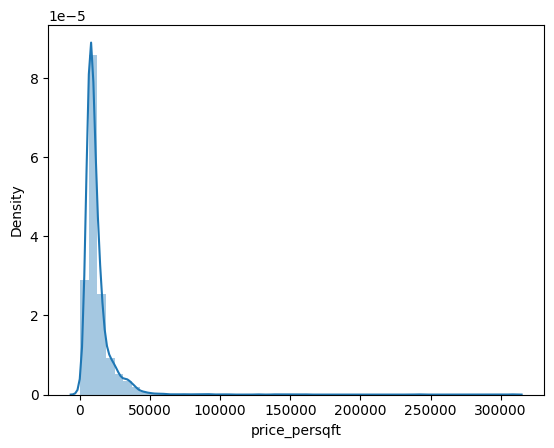

In [36]:
sns.distplot(df['price_persqft'])

In [37]:
outliers_sqft['price_persqft'].describe()

count      347.000000
mean     29009.452450
std      11975.763529
min       2732.000000
25%      25521.500000
50%      29685.000000
75%      35495.500000
max      71915.000000
Name: price_persqft, dtype: float64

In [38]:
outliers_sqft['price_persqft'].quantile(0.99)

57386.020000000004

In [39]:
df.drop(df[df['price_persqft']>57000].index,axis=0,inplace=True)


/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3261122634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_persqft'])


<Axes: xlabel='price_persqft', ylabel='Density'>

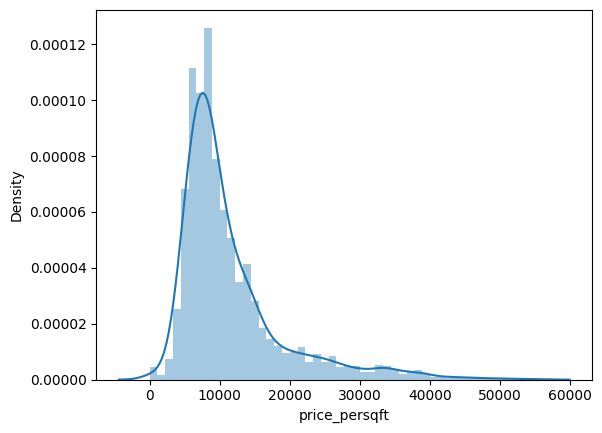

In [40]:
sns.distplot(df['price_persqft'])

In [41]:
df['area']=df['area'].astype(str).apply(extract)

In [42]:
df['area']=df['area'].astype(float)

In [43]:
df['area']=round(df['area'],3)

In [44]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [45]:
df['area'].describe()

count      3860.00
mean       5000.11
std      141674.82
min         139.88
25%        1250.00
50%        1750.16
75%        2358.16
max     8711260.00
Name: area, dtype: float64

In [46]:
df['area'].quantile(0.99)

8175.113999999986

In [47]:
df[df['area']>10000]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
82,pyramid elite,0.46,79.00,2.00,2.00,1,not avilable,0.00,NaN,Under Construction,sector 86,58227.85,flat,NaN,NaN,58141.00,0,0,0,0,0,2,15
114,signature the roselia,0.45,7.00,2.00,2.00,2,not avilable,2.00,South-West,New Property,sector 95,642857.14,flat,NaN,NaN,569243.00,0,0,0,0,0,2,76
1285,ramsons kshitij,0.24,53.00,2.00,2.00,1,others,10.00,North-West,Relatively New,sector 95,45283.02,flat,NaN,NaN,45966.00,0,0,0,0,1,2,33
1287,ramsons kshitij,0.31,5.00,2.00,2.00,1,"study room,others",1.00,North-East,Relatively New,sector 95,620000.00,flat,NaN,NaN,607936.00,1,0,0,0,1,2,65
1288,rof ananda,0.33,60.00,2.00,2.00,1,not avilable,13.00,South-West,Relatively New,sector 95,55000.00,flat,NaN,NaN,54917.00,0,0,0,0,0,2,37
1289,rof ananda,0.38,58.00,3.00,2.00,1,not avilable,12.00,North,Relatively New,sector 95,65517.24,flat,NaN,NaN,64412.00,0,0,0,0,0,2,51
1290,rof ananda,0.21,61.00,1.00,1.00,1,not avilable,13.00,North,Relatively New,sector 95,34426.23,flat,NaN,NaN,34401.00,0,0,0,0,0,2,68
1410,signature the serenas,0.28,57.00,1.00,1.00,2,study room,1.00,North-West,Relatively New,sohna road,49122.81,flat,NaN,NaN,48811.00,1,0,0,0,0,2,37
1618,m3m golfestate,13.20,12000.00,4.00,4.00,3,servant room,13.00,North,Moderately Old,sector 65,11000.00,flat,NaN,NaN,11000.00,0,1,0,0,0,2,60
2314,rof ananda,0.38,58.00,2.00,2.00,2,study room,10.00,East,New Property,sector 95,65517.24,flat,NaN,NaN,64529.00,1,0,0,0,0,2,15


In [48]:
df.shape

(3872, 23)

In [49]:
df=df[df['area']<10000]

In [50]:
df.shape

(3834, 23)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

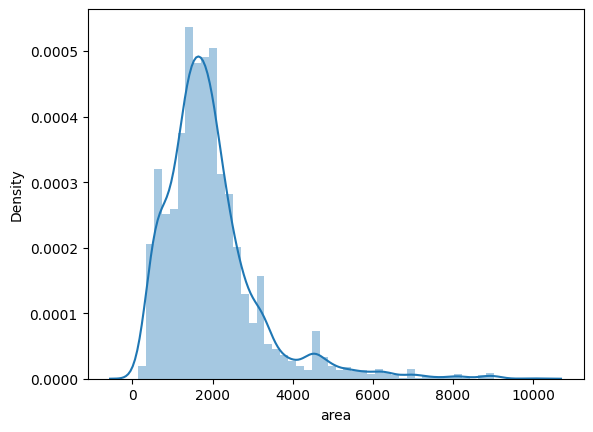

In [51]:
sns.distplot(df['area'])

<Axes: >

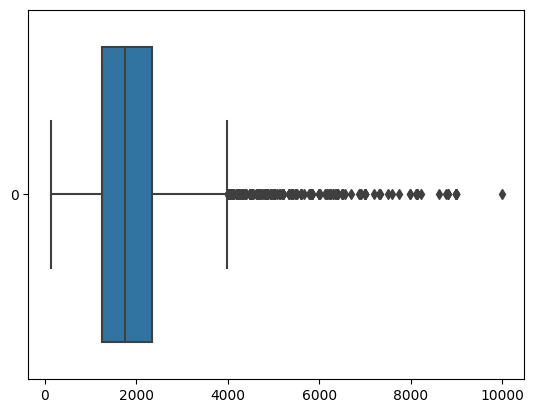

In [52]:
sns.boxplot(df['area'],orient='h')

In [53]:
df['super_built_up_area'].describe()

count   1890.00
mean    1917.10
std      742.92
min       89.00
25%     1466.25
50%     1828.00
75%     2215.00
max     6926.00
Name: super_built_up_area, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

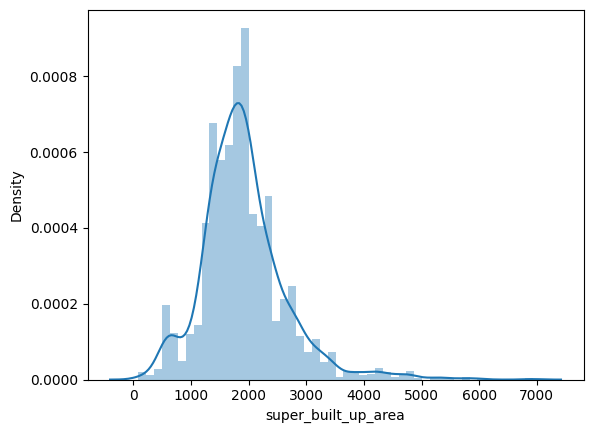

In [54]:
sns.distplot(df['super_built_up_area'])

<Axes: >

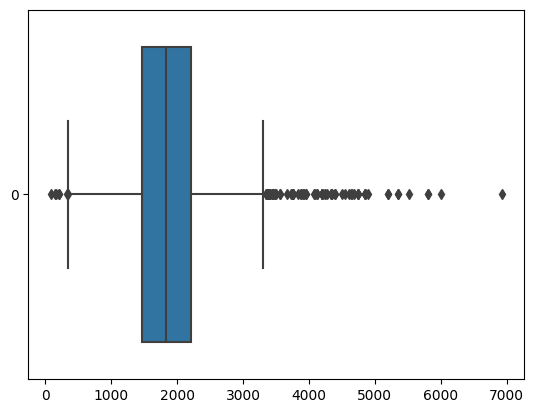

In [55]:
sns.boxplot(df['super_built_up_area'],orient='h')

In [56]:
# Calculate the IQR for the 'price' column
Q1 = df['super_built_up_area'].quantile(0.25)
Q3 = df['super_built_up_area'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['super_built_up_area'] < lower_bound) ]



In [57]:
lower_bound

343.125

In [58]:
outliers

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
107,godrej aria,1.10,11482.00,2.00,2.00,3,not avilable,9.00,NaN,New Property,sector 79,958.02,flat,89.00,NaN,NaN,0,0,0,0,0,2,62
135,sushant lok 1 builder floors,2.50,12920.00,3.00,3.00,2,not avilable,2.00,NaN,New Property,sector 43,1934.98,flat,215.00,NaN,NaN,0,0,0,0,0,2,0
417,unitech greenwood city,2.40,12346.00,3.00,3.00,2,servant room,1.00,North-West,New Property,sector 45,1943.95,flat,216.00,NaN,NaN,0,1,0,0,0,0,19
1985,godrej nature plus,1.40,15124.00,3.00,2.00,3+,not avilable,20.00,NaN,New Property,sector 33,925.68,flat,145.00,NaN,86.00,0,0,0,0,0,2,70
2761,godrej oasis,1.45,8367.00,2.00,2.00,3+,study room,9.00,NaN,Relatively New,sector 88a,1733.00,flat,161.00,NaN,108.40,1,0,0,0,0,1,85
2818,ramsons kshitij,0.22,6470.00,1.00,1.00,1,not avilable,2.00,NaN,New Property,sector 95,340.03,flat,340.00,NaN,NaN,0,0,0,0,0,2,0
2840,signature andour heights,0.39,9846.00,1.00,1.00,2,not avilable,1.00,NaN,New Property,sector 71,396.10,flat,325.00,NaN,NaN,0,0,0,0,0,2,0


In [59]:
df.loc[135,'super_built_up_area']=215*9
df.loc[417,'super_built_up_area']=216*9
df.loc[2761,'super_built_up_area']=161*10.76
df.loc[2761,'carpet_area']=108.4*10.76
df.loc[107,'super_built_up_area']=89*10.76

In [60]:
outliers = df[(df['super_built_up_area'] < lower_bound) ]

In [61]:
outliers

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1985,godrej nature plus,1.40,15124.00,3.00,2.00,3+,not avilable,20.00,NaN,New Property,sector 33,925.68,flat,145.00,NaN,86.00,0,0,0,0,0,2,70
2818,ramsons kshitij,0.22,6470.00,1.00,1.00,1,not avilable,2.00,NaN,New Property,sector 95,340.03,flat,340.00,NaN,NaN,0,0,0,0,0,2,0
2840,signature andour heights,0.39,9846.00,1.00,1.00,2,not avilable,1.00,NaN,New Property,sector 71,396.10,flat,325.00,NaN,NaN,0,0,0,0,0,2,0


In [62]:
df.drop(107,axis=0,inplace=True)# data error area,super_built_up_area

In [63]:
df['built_up_area'].describe()

count   1826.00
mean    2023.01
std     1481.89
min       14.00
25%     1116.25
50%     1700.00
75%     2475.00
max     9500.00
Name: built_up_area, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

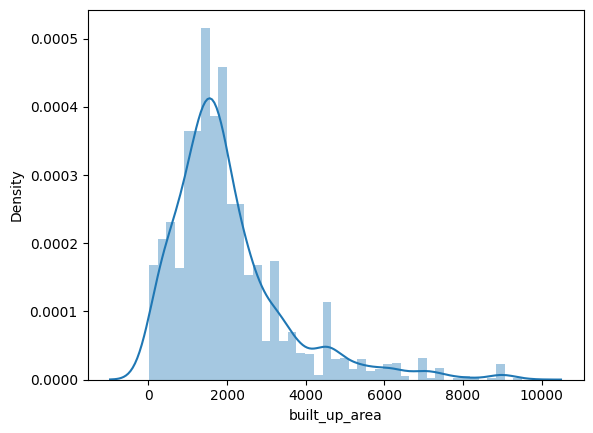

In [64]:
sns.distplot(df['built_up_area'])

In [65]:
# inter quartile range
# Calculate the IQR for the 'price' column
Q1 = df['built_up_area'].quantile(0.25)
Q3 = df['built_up_area'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [66]:
lower_bound

-921.875

In [67]:
upper_bound

4513.125

In [68]:
temp=df[df['built_up_area'] >4514]


In [69]:
temp.shape

(134, 23)

In [70]:
temp

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
488,citizen apartment,3.55,6826.00,5.00,6.00,3+,"pooja room,study room,servant room,store room",11.00,North,Moderately Old,sector 51,5200.70,flat,NaN,5200.00,4700.00,1,1,1,1,0,0,157
1578,beverley park 1,8.44,16230.00,4.00,5.00,3,servant room,9.00,North-East,Moderately Old,sector 43,5200.25,flat,5200.00,5000.00,4900.00,0,1,0,0,0,1,117
1619,experion windchants,6.50,10416.00,4.00,5.00,3,not avilable,11.00,South,Relatively New,sector 112,6240.40,flat,NaN,4800.00,NaN,0,0,0,0,0,2,55
1649,adani m2k oyster grande,4.55,10000.00,4.00,4.00,3+,not avilable,11.00,North-East,Relatively New,sector 102,4550.00,flat,4650.00,4630.00,4550.00,0,0,0,0,0,0,60
1940,bptp freedom park life,5.50,8982.00,5.00,6.00,3+,"pooja room,servant room",19.00,East,Moderately Old,sector 57,6123.36,flat,NaN,5010.00,NaN,0,1,0,1,0,0,153
2288,paras quartier,5.90,11028.00,4.00,4.00,3+,not avilable,0.00,NaN,Moderately Old,sector 2,5350.02,flat,NaN,5350.00,NaN,0,0,0,0,0,2,63
2299,raheja vedas,2.15,4134.00,3.00,4.00,3+,study room,12.00,East,Relatively New,sector 108,5200.77,flat,5200.00,4600.00,4000.00,1,0,0,0,0,2,0
2426,residency grand,5.00,9615.00,5.00,5.00,3+,not avilable,2.00,East,Undefined,sector 52,5200.21,flat,NaN,5200.00,NaN,0,0,0,0,0,2,0
2886,indepedent,15.00,33186.00,5.00,6.00,3+,"pooja room,study room,servant room,store room",3.00,North,Moderately Old,sector 26,4520.00,house,NaN,4518.00,NaN,1,1,1,1,0,0,78
2899,grover homes sec 4,4.75,9374.00,5.00,5.00,1,"pooja room,study room,servant room",1.00,South-East,Old Property,sector 4,5069.00,house,NaN,5067.00,NaN,1,1,0,1,0,0,35


In [71]:
'''built_uparea is justified by super_builtuparea or no.of bedrooms but in some cases we don't have info about 
bedroom and superbuiltup area.'''
temp[(temp['bedRoom'].isna())&(temp['super_built_up_area'].isna())&(temp['carpet_area'].isna())]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2934,international city by sobha phase 2,NaN,13622.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,6178.00,house,NaN,6178.00,NaN,0,0,0,0,0,2,46
2938,emaar mgf marbella,NaN,16058.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,7319.00,house,NaN,7319.00,NaN,0,0,0,0,0,2,74
2939,emaar mgf marbella,NaN,16058.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,5608.00,house,NaN,5608.00,NaN,0,0,0,0,0,2,74
2940,international city by sobha phase 2,NaN,13623.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,6178.00,house,NaN,6178.00,NaN,0,0,0,0,0,2,46
2943,experion windchants,NaN,12027.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 112,6872.00,house,NaN,6872.00,NaN,0,0,0,0,0,2,57
2944,emaar mgf marbella,NaN,15700.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,5608.00,house,NaN,5608.00,NaN,0,0,0,0,0,2,74
2945,emaar mgf marbella,NaN,19708.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,6522.00,house,NaN,6522.00,NaN,0,0,0,0,0,2,74
2946,emaar mgf marbella,NaN,16039.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 66,5608.00,house,NaN,5608.00,NaN,0,0,0,0,0,2,74
2947,dlf alameda,NaN,13331.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 73,5844.00,house,NaN,5844.00,NaN,0,0,0,0,0,2,49
2948,international city by sobha phase 1,NaN,11100.00,NaN,NaN,NaN,not avilable,NaN,NaN,Undefined,sector 109,6183.00,house,NaN,6183.00,NaN,0,0,0,0,0,2,54


In [72]:
'''we also dont have price values here so lets drop it.we have limited domain info.'''
df.drop(temp[(temp['bedRoom'].isna())&(temp['super_built_up_area'].isna())&(temp['carpet_area'].isna())].index,axis=0
       ,inplace=True)

In [73]:
df.shape

(3812, 23)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

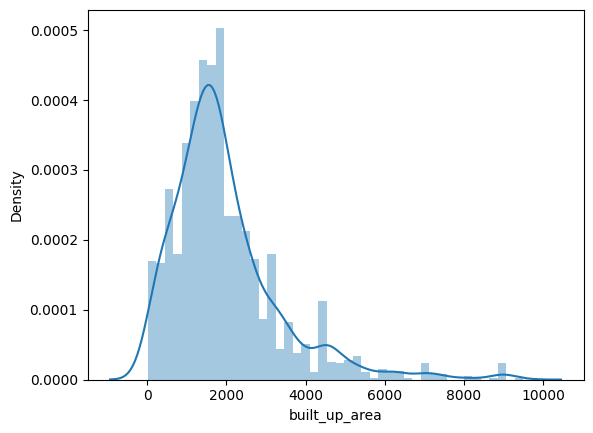

In [74]:
sns.distplot(df['built_up_area'])

<Axes: >

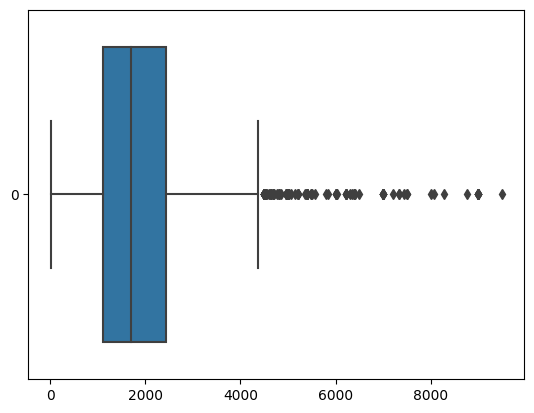

In [75]:
sns.boxplot(df['built_up_area'],orient='h')

In [76]:
df[df['built_up_area']>7000]# justified by bedrooms

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2932,puri diplomatic greens,9.00,11250.00,5.00,5.00,3+,servant room,3.00,North-East,Relatively New,sector 111,7994.68,house,NaN,8000.00,NaN,0,1,0,0,0,2,112
2973,vipul tatvam villa,19.50,22222.00,5.00,6.00,3,"pooja room,study room,servant room,store room",2.00,North,Moderately Old,sector 48,8772.00,house,NaN,8775.00,NaN,1,1,1,1,0,0,110
3152,anamika enclave,6.00,14492.00,9.00,9.00,3+,not avilable,3.00,North-West,Old Property,sector 12,4142.60,house,NaN,9000.00,NaN,0,0,0,0,0,2,9
3167,indepedent,8.00,9654.00,10.00,10.00,3+,"pooja room,study room,servant room",4.00,NaN,Relatively New,sector 56,365.84,house,NaN,8286.00,NaN,1,1,0,1,0,1,107
3244,sobha city,NaN,NaN,5.00,1.00,0,not avilable,1.00,NaN,Old Property,sector 108,7327.56,house,NaN,7331.00,NaN,0,0,0,0,0,2,59
3378,sobha city,10.50,14323.00,5.00,4.00,3+,not avilable,1.00,East,Undefined,sector 108,7327.56,house,NaN,7331.00,NaN,0,0,0,0,0,2,59
3435,indepedent,6.25,6944.00,3.00,3.00,0,not avilable,1.00,NaN,Moderately Old,sohna road,8998.00,house,NaN,9000.00,NaN,0,0,0,0,0,2,0
3482,indepedent,3.87,5160.00,19.00,17.00,3+,"study room,store room",5.00,North-West,Relatively New,sector 17a,1624.76,house,NaN,7500.00,NaN,1,0,1,0,0,2,68
3544,vipul tatvam villa,22.00,24450.00,5.00,6.00,3,servant room,3.00,NaN,Moderately Old,sector 48,8998.00,house,NaN,9000.00,NaN,0,1,0,0,0,2,54
3668,experion windchants,9.50,23457.00,5.00,5.00,3,servant room,2.00,NaN,Relatively New,sector 112,4045.76,house,NaN,7450.00,NaN,0,1,0,0,0,2,45


In [77]:
df['carpet_area'].describe()

count    1907.00
mean     1408.36
std       941.28
min        15.00
25%       822.00
50%      1276.00
75%      1760.00
max     11000.00
Name: carpet_area, dtype: float64

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

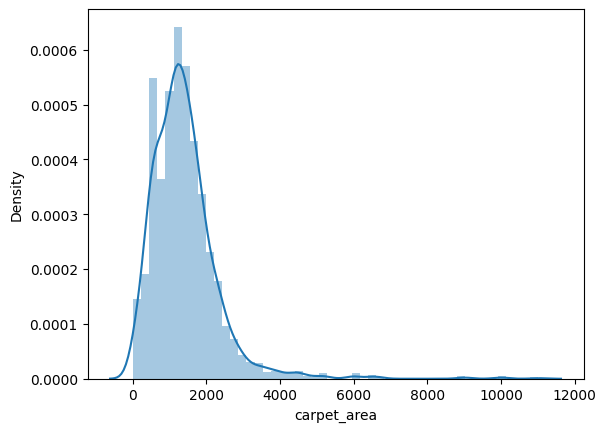

In [78]:
sns.distplot(df['carpet_area'])

<Axes: >

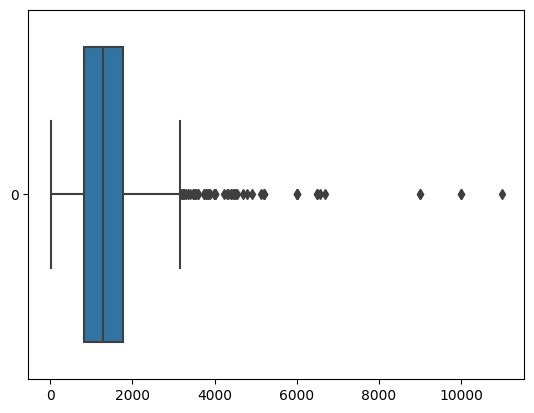

In [79]:
sns.boxplot(df['carpet_area'],orient='h')

In [80]:
iqr=df['carpet_area'].quantile(0.75)-df['carpet_area'].quantile(0.25)

In [81]:
df['carpet_area'].quantile(0.75)+1.5*iqr

3167.0

In [82]:
df[df['carpet_area']>3167]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
143,vatika sovereign next sector-82 a gurgaon,2.91,6700.00,4.00,4.00,3,"study room,servant room,store room",6.00,East,Under Construction,sector 82a,4343.28,flat,4350.00,NaN,3480.00,1,1,1,0,0,0,79
173,palam vihar society,3.35,7444.00,4.00,4.00,3+,study room,2.00,NaN,New Property,sector 2,4500.27,flat,NaN,NaN,4500.00,1,0,0,0,0,2,66
219,vatika sovereign next,3.85,7500.00,5.00,6.00,3+,"pooja room,servant room",6.00,NaN,New Property,sector 82a,5133.33,flat,NaN,NaN,5140.00,0,1,0,1,0,2,148
288,m3m golfestate,6.15,15998.00,3.00,5.00,3+,servant room,1.00,West,Relatively New,sector 65,3844.23,flat,NaN,NaN,3844.00,0,1,0,0,0,1,49
291,jmd gardens,3.25,7510.00,4.00,4.00,3+,servant room,17.00,South-East,Old Property,sector 33,4327.56,flat,NaN,NaN,4328.00,0,1,0,0,0,0,130
355,dlf city plots phase 3,6.50,18571.00,4.00,5.00,3+,servant room,3.00,North-East,New Property,sector 24,3500.08,flat,NaN,NaN,3500.00,0,1,0,0,0,1,42
385,lagoon apartment,6.00,13636.00,4.00,6.00,3+,not avilable,7.00,NaN,Moderately Old,ambience island,4400.12,flat,NaN,NaN,4400.00,0,0,0,0,0,2,0
387,indiabulls centrum park,1.90,5681.00,3.00,4.00,3+,"pooja room,study room,servant room,others",10.00,North-East,Relatively New,sector 103,3344.48,flat,NaN,NaN,3344.00,1,1,0,1,1,0,49
405,elan the presidential,6.30,15384.00,5.00,6.00,3+,not avilable,10.00,North-East,Under Construction,sector 106,4095.16,flat,4095.00,NaN,3500.00,0,0,0,0,0,0,62
408,central park resorts,11.25,28266.00,4.00,5.00,3+,"pooja room,servant room",2.00,North-West,Relatively New,sector 48,3980.05,flat,NaN,NaN,3980.00,0,1,0,1,0,2,45


In [83]:
'''1286,1996 these have large carpet area but having 1 bhk data error '''
df.drop([1286,1996],axis=0,inplace=True)

In [84]:
df[df['carpet_area']>6000]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
697,ats triumph,4.45,6846.00,4.00,5.00,3+,not avilable,27.00,North,Relatively New,sector 104,6500.15,flat,NaN,NaN,6500.00,0,0,0,0,0,2,110
789,tata gurgaon gateway,6.00,9139.00,5.00,6.00,3+,not avilable,24.00,North,Moderately Old,sector 113,6565.27,flat,NaN,NaN,6565.00,0,0,0,0,0,2,117
1614,the penthouses at the hibiscus,8.00,8888.00,4.00,3.00,3,servant room,7.00,South-East,Moderately Old,sector 50,9000.90,flat,NaN,NaN,9000.00,0,1,0,0,0,2,35
2186,central park resorts,15.00,22388.00,5.00,6.00,3+,"pooja room,study room,servant room",17.00,NaN,Relatively New,sector 48,6700.02,flat,NaN,NaN,6700.00,1,1,0,1,0,1,45
3174,indepedent,8.00,8000.00,3.00,9.00,2,not avilable,3.00,NaN,New Property,sector 25,9996.04,house,NaN,NaN,10000.00,0,0,0,0,0,2,0
3645,indepedent,18.40,1859.00,6.00,8.00,3+,"pooja room,store room,servant room",4.00,South,Relatively New,sector 26,4519.20,house,NaN,NaN,11000.00,0,1,1,1,0,0,60
3709,ansal sushant lok plots,11.50,17692.00,7.00,8.00,3+,"servant room,store room,pooja room",3.00,NaN,Old Property,sector 43,3766.00,house,NaN,9000.00,6500.00,0,1,1,1,0,0,31
3794,indepedent,18.25,18250.00,7.00,9.00,3+,"pooja room,study room,servant room,store room",4.00,East,Relatively New,sector 26,548.76,house,NaN,NaN,10000.00,1,1,1,1,0,0,77
3838,indepedent,10.00,37027.00,5.00,5.00,3+,"pooja room,servant room",3.00,East,Moderately Old,sector 25,2700.76,house,NaN,9500.00,9000.00,0,1,0,1,0,1,29


In [85]:
df['bedRoom'].describe()

count   3770.00
mean       3.36
std        1.94
min        1.00
25%        2.00
50%        3.00
75%        4.00
max       36.00
Name: bedRoom, dtype: float64

In [86]:
out=df[(df['bedRoom']>10)]

In [87]:
out

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2876,indepedent,5.00,43029.00,21.00,21.00,3+,servant room,5.00,North,Relatively New,sector 54,1162.00,house,NaN,1161.00,NaN,0,1,0,0,0,1,49
2877,indepedent,3.00,5952.00,12.00,12.00,3+,others,5.00,West,New Property,sector 43,5040.00,house,NaN,558.00,NaN,0,0,0,0,1,1,20
2878,indepedent,4.50,39062.00,20.00,20.00,3+,servant room,4.00,East,Relatively New,sector 43,1152.00,house,NaN,1152.00,NaN,0,1,0,0,0,1,22
2880,luxury dlf city floors,20.00,44454.00,16.00,16.00,3+,servant room,4.00,NaN,New Property,sector 26,4499.00,house,NaN,4500.00,NaN,0,1,0,0,0,0,31
2885,dlf city plots phase 3,5.00,34153.00,13.00,13.00,3+,pooja room,4.00,North,New Property,sector 24,1464.00,house,NaN,1467.00,NaN,0,0,0,1,0,1,91
2909,floor wise designer kothi,13.00,48113.00,12.00,16.00,3+,"pooja room,study room,servant room,store room",4.00,North-East,New Property,sector 25,2702.00,house,NaN,2700.00,NaN,1,1,1,1,0,0,144
2914,indepedent,7.49,27720.00,12.00,12.00,3+,"study room,pooja room,servant room",4.00,South-East,Relatively New,sector 55,2702.00,house,NaN,2700.00,NaN,1,1,0,1,0,0,49
2915,indepedent,13.50,49963.00,16.00,16.00,3+,"pooja room,study room,servant room,others",4.00,North-West,Relatively New,sector 43,2702.00,house,NaN,2700.00,NaN,1,1,0,1,1,2,41
2916,indepedent,11.95,43534.00,12.00,12.00,3+,servant room,4.00,West,Relatively New,sector 56,2745.00,house,NaN,2745.00,NaN,0,1,0,0,0,0,21
2917,indepedent,12.39,45855.00,16.00,18.00,3+,"pooja room,servant room",4.00,North-East,New Property,sector 56,2702.00,house,NaN,2700.00,NaN,0,1,0,1,0,0,49


In [88]:
df['built_up_area']=df[(df['bedRoom']>10)&(df['built_up_area']<800)]['built_up_area']*9

In [89]:
t=out[(out['super_built_up_area'].isna())&(out['built_up_area'].isna())&(out['carpet_area'].isna())]

In [90]:
t['built_up_area']=t['area'].astype('float')

In [91]:
t

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [92]:
df.update(t)

In [93]:
df['bathroom'].describe()

count   3770.00
mean       3.41
std        2.00
min        1.00
25%        2.00
50%        3.00
75%        4.00
max       36.00
Name: bathroom, dtype: float64

In [94]:
df.drop(df[df['bathroom']==36].index,axis=0,inplace=True)
''' too small rooms may be error '''

' too small rooms may be error '

In [95]:
df['ratio']=round(df['area']/df['bedRoom'])
'''ek bedroom ka approx kitna area hai
   jitna bada hai uska matlb room bada hai so we detect chota wala'''

'ek bedroom ka approx kitna area hai\n   jitna bada hai uska matlb room bada hai so we detect chota wala'

In [96]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
2674,breez global heights,0.39,4105.00,2.00,2.00,2,not avilable,3.00,NaN,Relatively New,sohna road,950.06,flat,950.00,NaN,610.00,0,0,0,0,0,2,0,475.00
842,mapsko royale ville,1.15,6424.00,3.00,4.00,2,"servant room,pooja room",15.00,North-East,Relatively New,sector 82,1790.16,flat,1790.00,NaN,NaN,0,1,0,1,0,0,104,597.00
3048,indepedent,0.60,13333.00,3.00,3.00,0,not avilable,3.00,NaN,Undefined,sector 105,451.92,house,NaN,NaN,NaN,0,0,0,0,0,2,0,151.00
2485,zara aavaas,0.20,6644.00,1.00,2.00,2,not avilable,3.00,NaN,New Property,sector 104,301.02,flat,NaN,NaN,301.00,0,0,0,0,0,2,67,301.00
2694,bptp pedestal,1.90,9500.00,4.00,3.00,3,store room,2.00,East,New Property,sector 70a,2000.00,flat,NaN,NaN,1900.00,0,0,1,0,0,2,133,500.00


In [97]:
df['ratio'].describe()

count   3769.00
mean     602.51
std      283.38
min       36.00
25%      450.00
50%      598.00
75%      711.00
max     3801.00
Name: ratio, dtype: float64

In [98]:
lower_bound=450-1.5*(711-450)

In [99]:
lower_bound

58.5

In [100]:
df[df['ratio']<58.5]
''' ek room baut small data error'''

' ek room baut small data error'

In [101]:
df.drop(df[df['ratio']<58.5].index,axis=0,inplace=True)

In [102]:
df.shape

(3803, 24)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_37981/3545446498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['price_persqft']>50000]['price_persqft'])


<Axes: xlabel='price_persqft', ylabel='Density'>

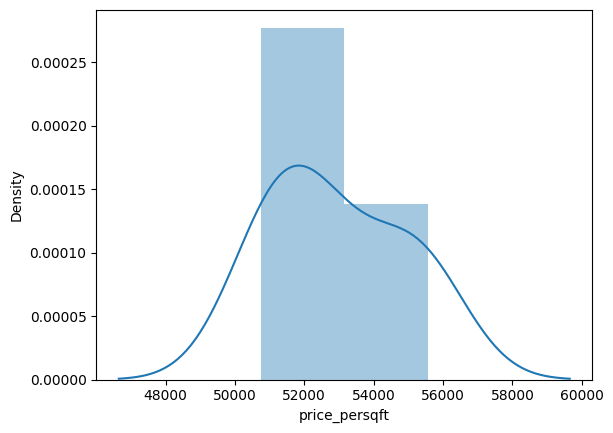

In [103]:
sns.distplot(df[df['price_persqft']>50000]['price_persqft'])

In [106]:
df[df['price_persqft']>55000]

,society,price,price_persqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,sector,area,type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,ratio
3761,emaar mgf marbella,18.00,55556.00,4.00,4.00,3+,"pooja room,study room,servant room",3.00,East,Moderately Old,sector 66,3240.00,house,NaN,NaN,NaN,1,1,0,1,0,1,75,810.00


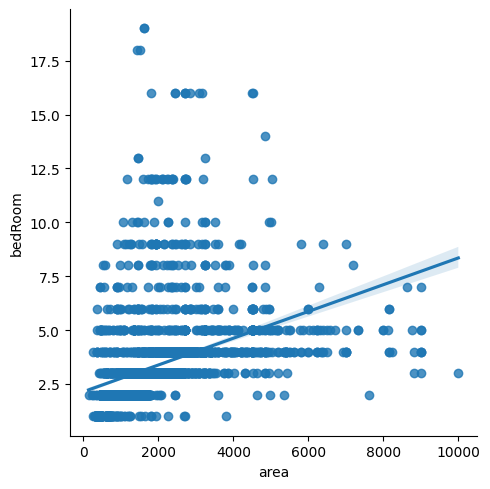

In [110]:
sns.lmplot(data=df,x='area',y='bedRoom')